# Are Your Employees Burning Out?
## Understand if your employee will Burn Out using the Burn Rate Dataset.


### Context
Understanding what will be the Burn Rate for the employee working in an organization based on the current pandemic situation where work from home is a boon and a bane. How are employees' Burn Rate affected based on various conditions provided?

### Content
Globally, World Mental Health Day is celebrated on October 10 each year. The objective of this day is to raise awareness about mental health issues around the world and mobilize efforts in support of mental health. According to an anonymous survey, about 450 million people live with mental disorders that can be one of the primary causes of poor health and disability worldwide. These days when the world is suffering from a pandemic situation, it becomes really hard to maintain mental fitness.

Employee ID: The unique ID allocated for each employee (example: fffe390032003000)
Date of Joining: The date-time when the employee has joined the organization (example: 2008-12-30)
Gender: The gender of the employee (Male/Female)
Company Type: The type of company where the employee is working (Service/Product)
WFH Setup Available: Is the work from home facility available for the employee (Yes/No)
Designation: The designation of the employee of work in the organization.
In the range of [0.0, 5.0] bigger is higher designation.
Resource Allocation: The amount of resource allocated to the employee to work, ie. number of working hours.
In the range of [1.0, 10.0] (higher means more resource)
Mental Fatigue Score: The level of fatigue mentally the employee is facing.
In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue.
Burn Rate: The value we need to predict for each employee telling the rate of Bur out while working.
In the range of [0.0, 1.0] where the higher the value is more is the burn out.
Acknowledgements
A special thanks to the HackerEarth Competition on the topic "HackerEarth Machine Learning Challenge: Are your employees burning out? which can be accessed here for this data collection.

### Inspiration
Try to build some really amazing predictions keeping in mind that happy and healthy employees are indisputably more productive at work, and in turn, help the business flourish profoundly.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('train.csv')

df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [3]:
df_test = pd.read_csv('test.csv')

df_test.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [4]:
print(df.info())
print('\n-----------\n')
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB
None

-----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           12250 non-null  object 

In [5]:
df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


#### Fixing Null Values

In [6]:
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [7]:
df.shape

(22750, 9)

In [8]:
df.dropna(subset = ["Burn Rate"], inplace=True)

print(df.shape)

(21626, 9)


In [9]:
df = df.fillna(df.median())

print("Are there any value missing now? \n---> "+str(df.isna().any().any()))


Are there any value missing now? 
---> False


In [10]:
print("Numerical valued features counts:\n----------", end="\n\n")

print(df["Designation"].value_counts(), end="\n------------------------\n\n")
print(df["Resource Allocation"].value_counts(), end="\n-----------------------\n\n")
print(df["Mental Fatigue Score"].value_counts(), end="\n------------------------\n")

Numerical valued features counts:
----------

2.0    7206
3.0    5698
1.0    4632
4.0    2275
0.0    1439
5.0     376
Name: Designation, dtype: int64
------------------------

4.0     4972
5.0     3670
3.0     3028
6.0     2817
2.0     1988
7.0     1880
1.0     1701
8.0      992
9.0      428
10.0     150
Name: Resource Allocation, dtype: int64
-----------------------

5.9    2384
6.0     451
5.8     436
6.3     432
6.5     426
       ... 
0.6      22
0.2      22
0.4      16
0.1      15
0.3      11
Name: Mental Fatigue Score, Length: 101, dtype: int64
------------------------


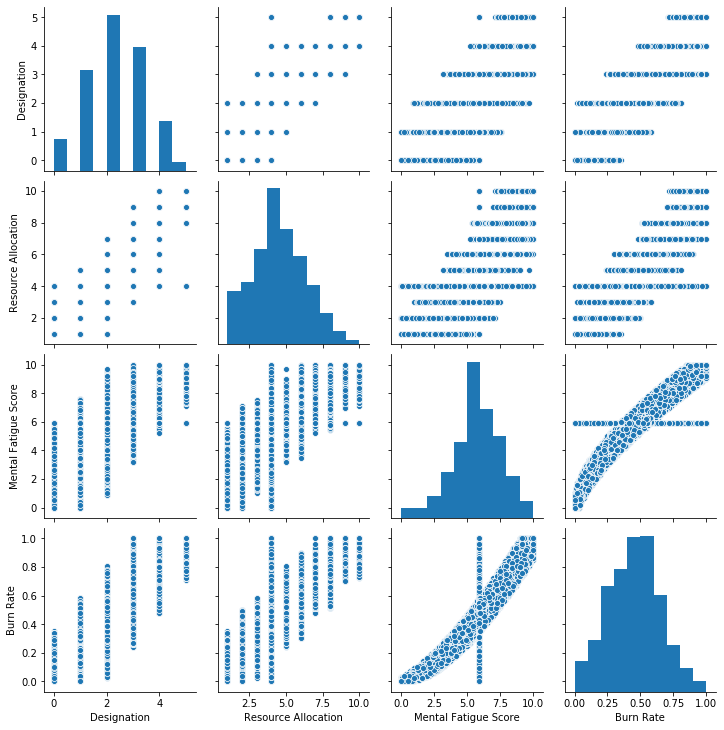

In [11]:
sns.pairplot(df)
plt.show()

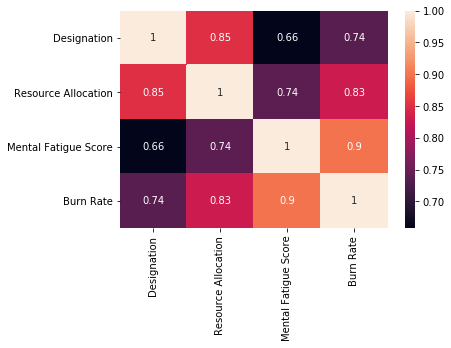

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,4.0,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


#### Breaking date feature into small chunks 

In [14]:
current_date = pd.to_datetime('today')

df["Date of Joining"] = pd.to_datetime(df["Date of Joining"])
df_test["Date of Joining"] = pd.to_datetime(df_test["Date of Joining"])

In [15]:
def create_days_count(data):
    return (current_date - data["Date of Joining"])

df["days_count"] = df.apply(create_days_count, axis=1)
df["days_count"] = df["days_count"].dt.days

df_test["days_count"] = df_test.apply(create_days_count, axis=1)
df_test["days_count"] = df_test["days_count"].dt.days

In [16]:
df['joining_year'] = pd.to_datetime(df['Date of Joining'], format="%Y/%m/%d").dt.year
df['joining_month'] = pd.to_datetime(df['Date of Joining'], format="%Y/%m/%d").dt.month
df['joining_day'] = pd.to_datetime(df['Date of Joining'], format="%Y/%m/%d").dt.day

In [17]:
df.drop('Date of Joining',axis=1,inplace=True)

In [18]:
df.head()

,Employee ID,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,days_count,joining_year,joining_month,joining_day
0,fffe32003000360033003200,Female,Service,No,2.0,3.0,3.8,0.16,4440,2008,9,30
1,fffe3700360033003500,Male,Service,Yes,1.0,2.0,5.0,0.36,4379,2008,11,30
2,fffe31003300320037003900,Female,Product,Yes,2.0,4.0,5.8,0.49,4644,2008,3,10
3,fffe32003400380032003900,Male,Service,Yes,1.0,1.0,2.6,0.20,4406,2008,11,3
4,fffe31003900340031003600,Female,Service,No,3.0,7.0,6.9,0.52,4508,2008,7,24


In [19]:
df_test['joining_year'] = pd.to_datetime(df_test['Date of Joining'], format="%Y/%m/%d").dt.year
df_test['joining_month'] = pd.to_datetime(df_test['Date of Joining'], format="%Y/%m/%d").dt.month
df_test['joining_day'] = pd.to_datetime(df_test['Date of Joining'], format="%Y/%m/%d").dt.day

df_test.drop('Date of Joining',axis=1,inplace=True)

In [20]:
# df_test.head()

####  Basic Visualation

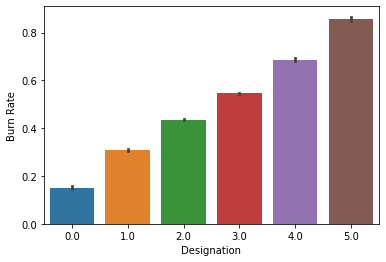

In [21]:
sns.barplot('Designation','Burn Rate',data=df)

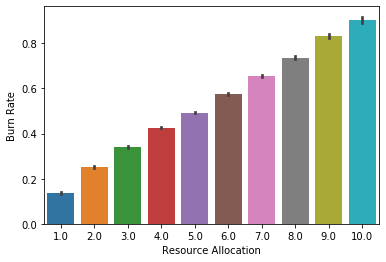

In [22]:
sns.barplot('Resource Allocation','Burn Rate',data=df)

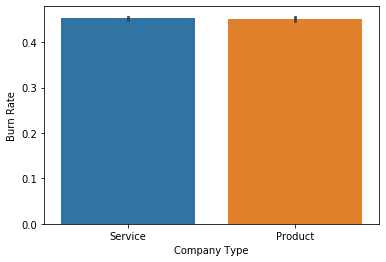

In [23]:
sns.barplot('Company Type',y='Burn Rate',data=df)

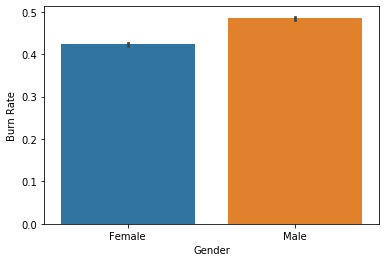

In [24]:
sns.barplot('Gender',y='Burn Rate',data=df)

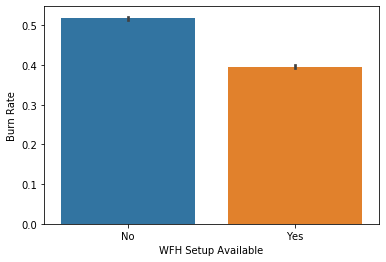

In [25]:
sns.barplot('WFH Setup Available','Burn Rate',data=df)

### Encoding categorical Variable into Numeric Variables 

In [26]:
def encoding(df):
    
    male = pd.get_dummies(df['Gender'],drop_first=True)
    Company = pd.get_dummies(df['Company Type'],drop_first=True)
    wfh = pd.get_dummies(df['WFH Setup Available'],drop_first=True)
    
    df.drop(['Gender','Company Type','WFH Setup Available'],axis=1,inplace=True)
    
    df = pd.concat([df,male,Company,wfh],axis=1)
    
    return df


In [27]:

df = encoding(df)
df_test = encoding(df_test)

In [28]:
df.head()

,Employee ID,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,days_count,joining_year,joining_month,joining_day,Male,Service,Yes
0,fffe32003000360033003200,2.0,3.0,3.8,0.16,4440,2008,9,30,0,1,0
1,fffe3700360033003500,1.0,2.0,5.0,0.36,4379,2008,11,30,1,1,1
2,fffe31003300320037003900,2.0,4.0,5.8,0.49,4644,2008,3,10,0,0,1
3,fffe32003400380032003900,1.0,1.0,2.6,0.20,4406,2008,11,3,1,1,1
4,fffe31003900340031003600,3.0,7.0,6.9,0.52,4508,2008,7,24,0,1,0


### Train-test-split

In [29]:
# df_test.head()


X = df.drop(['Employee ID','Burn Rate'],axis=1).values
y = df['Burn Rate'].values

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

### Feature Scaling

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### Linear Regression

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

lr_predict = lr.predict(X_test)


print('For LinearRegression \n\n')
print(f'MAE -> {mean_absolute_error(y_test,lr_predict)}')
print(f'MSE -> {mean_squared_error(y_test,lr_predict)}')
print(f'RMSE -> {np.sqrt(mean_squared_error(y_test,lr_predict))}')
print(f'Accuracy -> {r2_score(y_test,lr_predict)}')

For LinearRegression 


MAE -> 0.0535887310039623
MSE -> 0.00513021011484508
RMSE -> 0.07162548509326189
Accuracy -> 0.8674175664494691


#### Ridge Regression

In [33]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

predict_ridge = ridge_model.predict(X_test)


print('\nFor Ridge Regression \n\n')
print(f'MAE -> {mean_absolute_error(y_test,predict_ridge)}')

print(f'MSE -> {mean_squared_error(y_test,predict_ridge)}')

print(f'RMSE -> {np.sqrt(mean_squared_error(y_test,predict_ridge))}')

print(f'Accuracy -> {r2_score(y_test,predict_ridge)}')


For Ridge Regression 


MAE -> 0.053593378954143255
MSE -> 0.005129381844728163
RMSE -> 0.07161970290868402
Accuracy -> 0.8674389718237676


#### Random-Forest-Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_predict = rf.predict(X_test)


print('For Random Forest \n\n')
print(f'MAE -> {mean_absolute_error(y_test,rf_predict)}')
print(f'MSE -> {mean_squared_error(y_test,rf_predict)}')
print(f'RMSE -> {np.sqrt(mean_squared_error(y_test,rf_predict))}')
print(f'Accuracy -> {r2_score(y_test,rf_predict)}')

For Random Forest 


MAE -> 0.04987920514822155
MSE -> 0.004150637776414453
RMSE -> 0.06442544354844949
Accuracy -> 0.8927331152399768


#### Support Vector Machine Regression

In [35]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(X_train,y_train)
svm_predict = svm.predict(X_test)


print('For SVM \n\n')
print(f'MAE -> {mean_absolute_error(y_test,svm_predict)}')
print(f'MSE -> {mean_squared_error(y_test,svm_predict)}')
print(f'RMSE -> {np.sqrt(mean_squared_error(y_test,svm_predict))}')
print(f'Accuracy -> {r2_score(y_test,svm_predict)}')

For SVM 


MAE -> 0.053724256477634465
MSE -> 0.004875818252615415
RMSE -> 0.06982705960167172
Accuracy -> 0.8739919350259653


#### AdaBoostRegressor

In [36]:
from sklearn.ensemble import AdaBoostRegressor

abr_model = AdaBoostRegressor() 
abr_model.fit(X_train, y_train)

pred_abr = abr_model.predict(X_test)


print('For AdaBoostRegressor \n\n')
print(f'MAE -> {mean_absolute_error(y_test,pred_abr)}')
print(f'MSE -> {mean_squared_error(y_test,pred_abr)}')
print(f'RMSE -> {np.sqrt(mean_squared_error(y_test,pred_abr))}')
print(f'Accuracy -> {r2_score(y_test,pred_abr)}')

For AdaBoostRegressor 


MAE -> 0.06477111679744715
MSE -> 0.006681104161553369
RMSE -> 0.08173802151724355
Accuracy -> 0.8273370819686059


### Neural Network 

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(5,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1,activation='linear'))


model.compile(loss='mse',optimizer='adam')

In [45]:
early_Stop = EarlyStopping(patience=3)

In [46]:
model.fit(X_train,y_train,epochs=40,batch_size=250,validation_data=(X_test,y_test),callbacks=[early_Stop])

Train on 14489 samples, validate on 7137 samples
Epoch 1/40
14489/14489 [==============================] - 1s 73us/sample - loss: 0.2163 - val_loss: 0.0904
Epoch 2/40
14489/14489 [==============================] - 0s 18us/sample - loss: 0.1189 - val_loss: 0.0642
Epoch 3/40
14489/14489 [==============================] - 0s 20us/sample - loss: 0.0861 - val_loss: 0.0479
Epoch 4/40
14489/14489 [==============================] - 0s 22us/sample - loss: 0.0676 - val_loss: 0.0386
Epoch 5/40
14489/14489 [==============================] - 0s 24us/sample - loss: 0.0570 - val_loss: 0.0332
Epoch 6/40
14489/14489 [==============================] - 0s 24us/sample - loss: 0.0494 - val_loss: 0.0298
Epoch 7/40
14489/14489 [==============================] - 0s 24us/sample - loss: 0.0447 - val_loss: 0.0263
Epoch 8/40
14489/14489 [==============================] - 0s 24us/sample - loss: 0.0408 - val_loss: 0.0230
Epoch 9/40
14489/14489 [==============================] - 0s 24us/sample - loss: 0.0366 - val_l

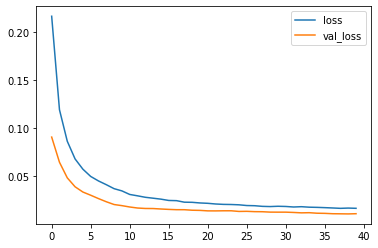

In [47]:
loss = pd.DataFrame(model.history.history)

loss.plot()

In [48]:
nn_predict = model.predict(X_test)

In [49]:
print('For Neural Network \n\n')
print(f'MAE -> {mean_absolute_error(y_test,nn_predict)}')
print(f'MSE -> {mean_squared_error(y_test,nn_predict)}')
print(f'RMSE -> {np.sqrt(mean_squared_error(y_test,nn_predict))}')
print(f'Accuracy -> {r2_score(y_test,nn_predict)}')

For Neural Network 


MAE -> 0.08037298004968303
MSE -> 0.010559732095632405
RMSE -> 0.10276055710063275
Accuracy -> 0.7270998755334859


# Hence Random-Forest-Regresser  Preform Best !! 

### Cross-validation using Random forest

In [52]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(RandomForestRegressor(),X,y,scoring='neg_mean_squared_error',cv=10)

In [53]:
rmse_score = np.sqrt(-score)

In [54]:
print(f'score -> {rmse_score}')
print()
print(f'Mean -> {rmse_score.mean()}')

score -> [0.06356779 0.06516689 0.06556656 0.06762151 0.06386884 0.06420455
 0.06342939 0.06440551 0.0623438  0.06452844]

Mean -> 0.06447032960121415


#### Test Data 

In [55]:
df_test.head()

,Employee ID,Designation,Resource Allocation,Mental Fatigue Score,days_count,joining_year,joining_month,joining_day,Male,Service,Yes
0,fffe31003300390039003000,2.0,5.0,7.7,4369,2008,12,10,0,1,0
1,fffe31003300310037003800,1.0,2.0,5.2,4487,2008,8,14,0,0,1
2,fffe33003400380035003900,1.0,3.0,5.9,4396,2008,11,13,1,0,1
3,fffe3100370039003200,3.0,6.0,4.6,4676,2008,2,7,0,1,0
4,fffe32003600390036003700,2.0,5.0,6.4,4515,2008,7,17,0,0,0


In [62]:
test_X = df_test.drop('Employee ID',axis=1)

In [63]:
scale_test = scaler.transform(test_X)

In [65]:
rf_full_predict = rf.predict(scale_test)

In [66]:
rf_full_predict

array([0.6327  , 0.3758  , 0.394125, ..., 0.8415  , 0.6019  , 0.1332  ])

In [69]:
df_test['predicted'] = np.round(rf_full_predict,2)

In [70]:
df_test

,Employee ID,Designation,Resource Allocation,Mental Fatigue Score,days_count,joining_year,joining_month,joining_day,Male,Service,Yes,predicted
0,fffe31003300390039003000,2.0,5.0,7.7,4369,2008,12,10,0,1,0,0.63
1,fffe31003300310037003800,1.0,2.0,5.2,4487,2008,8,14,0,0,1,0.38
2,fffe33003400380035003900,1.0,3.0,5.9,4396,2008,11,13,1,0,1,0.39
3,fffe3100370039003200,3.0,6.0,4.6,4676,2008,2,7,0,1,0,0.38
4,fffe32003600390036003700,2.0,5.0,6.4,4515,2008,7,17,0,0,0,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...
12245,fffe3900310034003700,1.0,2.0,6.1,4438,2008,10,2,0,1,1,0.41
12246,fffe32003600330034003000,2.0,4.0,5.9,4623,2008,3,31,0,0,1,0.29
12247,fffe31003800340039003000,4.0,7.0,9.6,4671,2008,2,12,1,1,0,0.84
12248,fffe32003600380031003800,3.0,6.0,6.7,4677,2008,2,6,1,1,0,0.60


In [72]:
submission = pd.DataFrame(data=df_test[['Employee ID','predicted']])

#### Submission Task

In [73]:
submission

,Employee ID,predicted
0,fffe31003300390039003000,0.63
1,fffe31003300310037003800,0.38
2,fffe33003400380035003900,0.39
3,fffe3100370039003200,0.38
4,fffe32003600390036003700,0.53
...,...,...
12245,fffe3900310034003700,0.41
12246,fffe32003600330034003000,0.29
12247,fffe31003800340039003000,0.84
12248,fffe32003600380031003800,0.60


In [74]:
submission.to_csv('Submission_Burn Rate.csv')

## Congrats !! We Have Successfully Completed the Task